In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


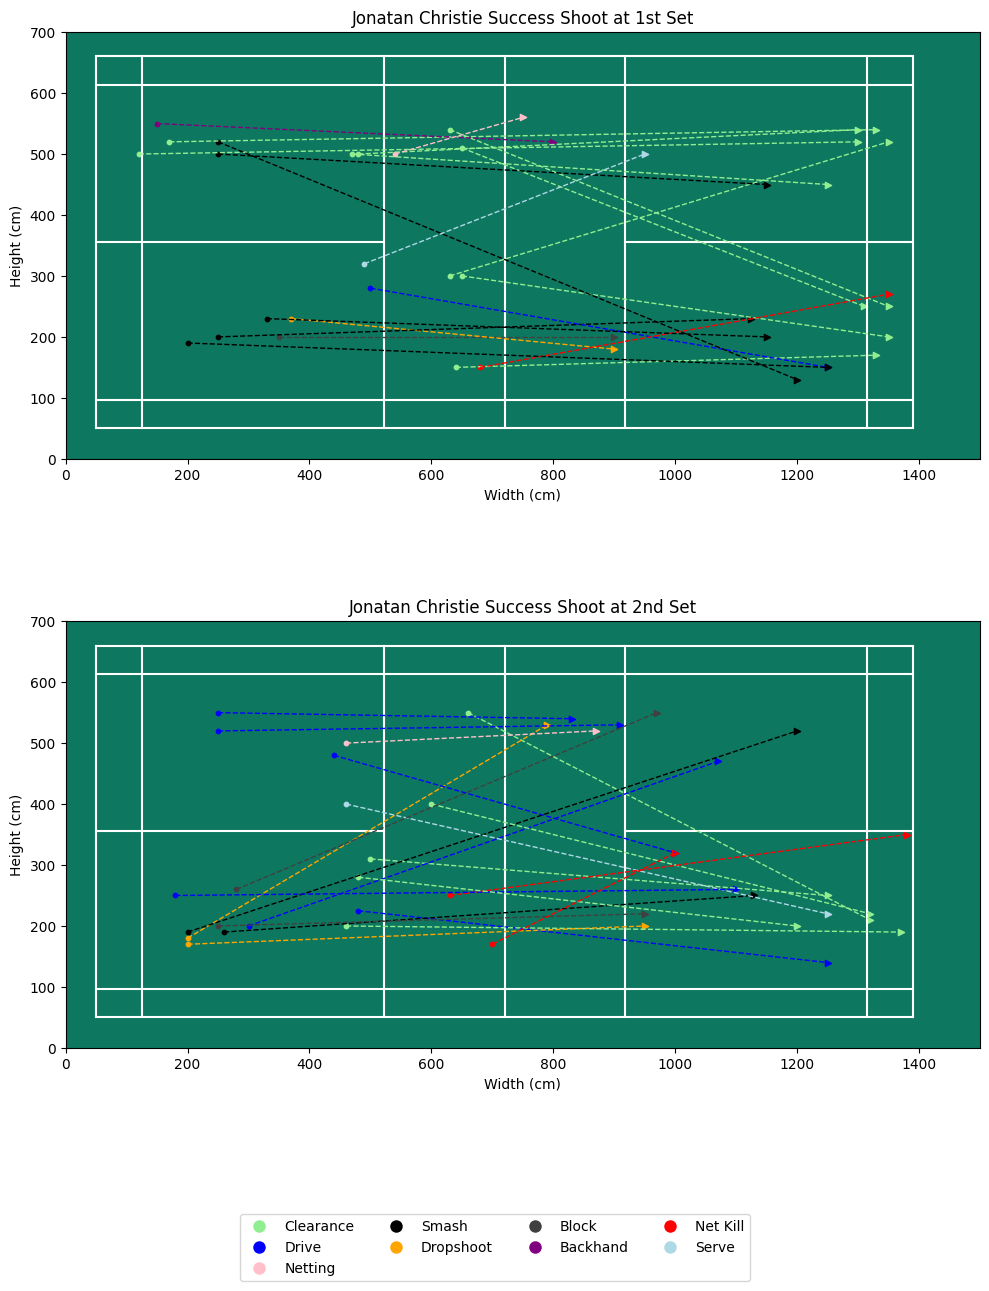

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the spreadsheet file (replace with your actual file path)
file_path = 'Jonatan Christie Last Touch Data (Final All England 2024).xlsx'
df = pd.read_excel(file_path)

# Filter for Set 1 and Success points
set_1_df = df[df['Set'] == 1]
success_points_set_1 = set_1_df[set_1_df['Status'] == 'Success']
# Filter for Set 2 and Success points
set_2_df = df[df['Set'] == 2]
success_points_set_2 = set_2_df[set_2_df['Status'] == 'Success']

# Define coordinates for the badminton court lines
coordinates = {
    "line 1": [(50, 50), (50, 96), (50, 355), (50, 614), (50, 660)],
    "line 2": [(126, 50), (126, 96), (126, 355), (126, 614), (126, 660)],
    "line 3": [(522, 50), (522, 96), (522, 355), (522, 614), (522, 660)],
    "line 4": [(720, 50), (720, 96), (720, 355), (720, 614), (720, 660)],
    "line 5": [(918, 50), (918, 96), (918, 355), (918, 614), (918, 660)],
    "line 6": [(1314, 50), (1314, 96), (1314, 355), (1314, 614), (1314, 660)],
    "line 7": [(1390, 50), (1390, 96), (1390, 355), (1390, 614), (1390, 660)]
}

def draw_court(ax):
    # Plot the points and connect lines
    for i in range(5):  # Iterate over each coordinate
        for name, coords in coordinates.items():
            if name == "line 1":
                if i != 2:  # Exclude third coordinate of line 1
                    ax.plot([coords[i][0], coordinates["line 7"][i][0]], [coords[i][1], coordinates["line 7"][i][1]], color='white')
                else:  # Connect third coordinate of line 1 with line 3
                    ax.plot([coords[i][0], coordinates["line 3"][i][0]], [coords[i][1], coordinates["line 3"][i][1]], color='white')
            elif name == "line 5" and i == 2:  # Connect third coordinate of line 5 with line 7
                ax.plot([coords[i][0], coordinates["line 7"][i][0]], [coords[i][1], coordinates["line 7"][i][1]], color='white')
    # Connect first and last coordinates for every line
    for name, coords in coordinates.items():
        ax.plot([coords[0][0], coords[-1][0]], [coords[0][1], coords[-1][1]], color='white')
    # Set limits and labels
    ax.set_xlim(0, 1500)
    ax.set_ylim(700, 0)
    ax.set_xlabel('Width (cm)')
    ax.set_ylabel('Height (cm)')
    ax.set_aspect('equal', adjustable='box')
    ax.invert_yaxis()  # Invert y-axis to match the orientation of the court

# Create a dictionary to map each type of hit to its corresponding color
hit_colors = {
    'Clearance': 'lightgreen',
    'Drive': 'blue',
    'Netting': 'pink',
    'Smash': 'black',
    'Dropshoot': '#FFA500',
    'Block': '#404040',
    'Backhand': 'purple',
    'Net Kill': 'red',
    'Serve': 'lightblue',
}

# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))
# Background Color
axs[0].set_facecolor('#0d785f')
axs[1].set_facecolor('#0d785f')
# Set 1
draw_court(axs[0])
axs[0].set_title('Jonatan Christie Success Shoot at 1st Set')
# Set 2
draw_court(axs[1])
axs[1].set_title('Jonatan Christie Success Shoot at 2nd Set')

for index, row in success_points_set_1.iterrows():
    x_lh = row['Last Hit Coordinate (X)']
    y_lh = row['Last Hit Coordinate (Y)']
    x_ls = row['Point Coordinate (X)']
    y_ls = row['Point Coordinate (Y)']
    hit_type = row['Type of Hit']
    color = hit_colors.get(hit_type, 'black')
    # Shoot Plot
    axs[0].scatter(x_lh, y_lh, color=color, s=10)
    axs[0].scatter(x_ls, y_ls, color=color, s=20, marker=">")
    axs[0].plot([x_lh, x_ls], [y_lh, y_ls], color=color, linestyle="--", lw=1)

for index, row in success_points_set_2.iterrows():
    x_lh = row['Last Hit Coordinate (X)']
    y_lh = row['Last Hit Coordinate (Y)']
    x_ls = row['Point Coordinate (X)']
    y_ls = row['Point Coordinate (Y)']
    hit_type = row['Type of Hit']
    color = hit_colors.get(hit_type, 'black')
    # Shoot Plot
    axs[1].scatter(x_lh, y_lh, color=color, s=10)
    axs[1].scatter(x_ls, y_ls, color=color, s=20, marker=">")
    axs[1].plot([x_lh, x_ls], [y_lh, y_ls], color=color, linestyle="--", lw=1)

# Create custom handles for the legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in hit_colors.values()]
labels = hit_colors.keys()

# Add legend below the subplots
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

plt.tight_layout()
plt.show()
